In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
from data_reader_writer import data_writer
import loads

import pypsa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Leading the Way - 2045

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Tidal stream              53.400000
Wave power                56.000000
Small Hydro              230.913108
Hydrogen                 712.738357
CCS Gas                  910.000000
Large Hydro             1691.699577
Solar Photovoltaics     6336.662879
Wind Onshore           27218.622542
Wind Offshore          34701.090000
Name: p_nom, dtype: float64
carrier
Liquid Air                      1215.062069
Compressed Air                  1656.082759
Battery                         3792.233034
Pumped Storage Hydroelectric    3896.000000
Name: p_nom, dtype: float64


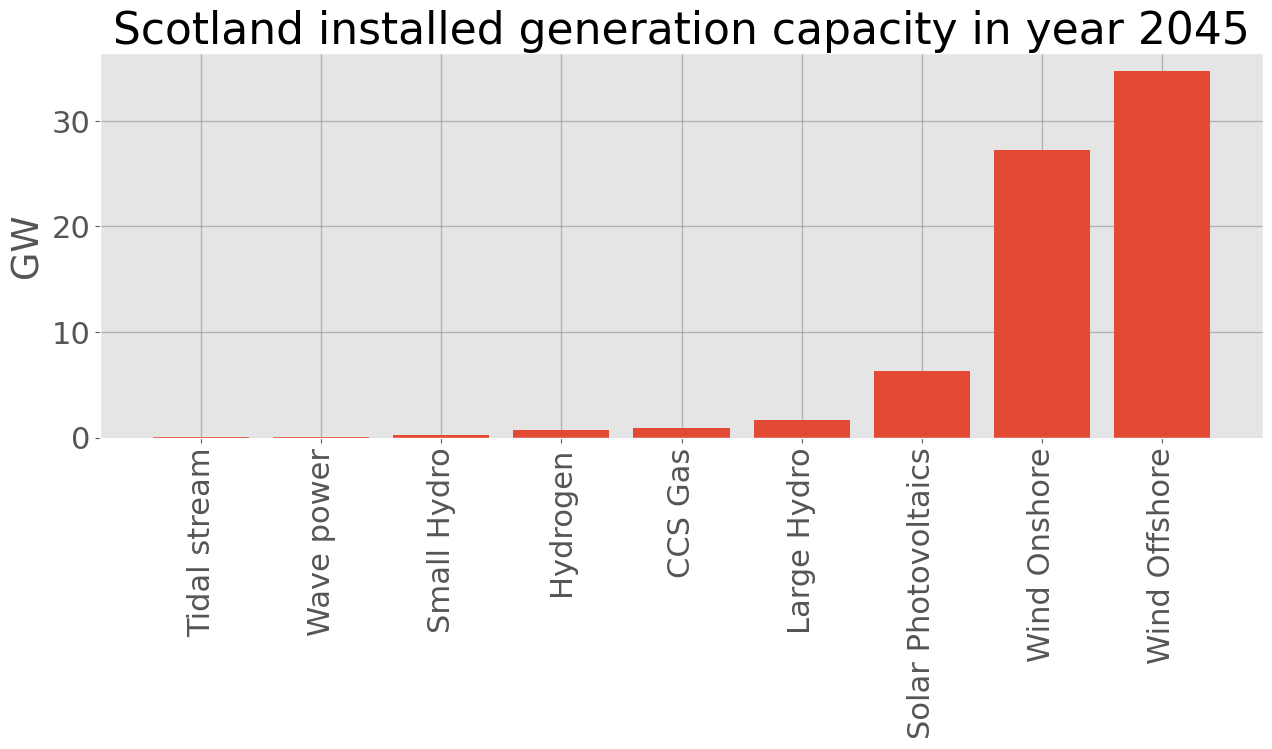

In [3]:
scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2045
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2045 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2045 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2045 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland_2045.index, generators_p_nom_scotland_2045.values / 1000)
plt.xticks(generators_p_nom_scotland_2045.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## Leading the Way - 2040

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Tidal stream              53.400000
Waste                     67.280000
Biomass (dedicated)       83.856490
Small Hydro              228.092963
Hydrogen                 692.879602
CCS Gas                  910.000000
Large Hydro             1671.038879
Solar Photovoltaics     4833.157232
Wind Onshore           26129.009521
Wind Offshore          34701.090000
Name: p_nom, dtype: float64
carrier
Liquid Air                      1215.062069
Compressed Air                  1656.082759
Battery                         3792.232842
Pumped Storage Hydroelectric    3896.000000
Name: p_nom, dtype: float64


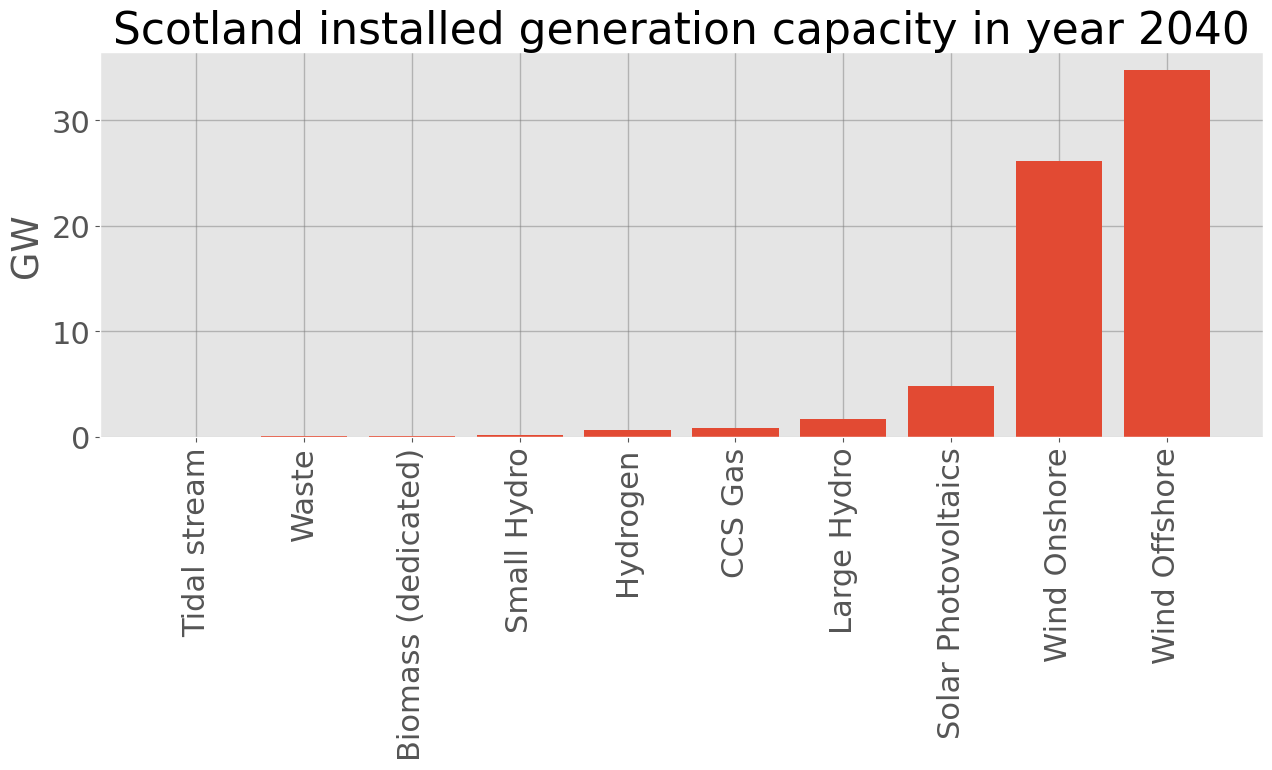

In [4]:
scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2040
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2040 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2040 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2040 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## Leading the Way - 2035

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Tidal stream              53.400000
Waste                     73.776000
Biomass (dedicated)      195.533214
Small Hydro              225.336082
Hydrogen                 687.576489
CCS Gas                  910.000000
Large Hydro             1650.841597
Solar Photovoltaics     3529.916140
Wind Onshore           24798.783273
Wind Offshore          31251.090000
Name: p_nom, dtype: float64
carrier
Liquid Air                       663.337931
Compressed Air                  1380.220690
Pumped Storage Hydroelectric    3296.000000
Battery                         3435.132871
Name: p_nom, dtype: float64


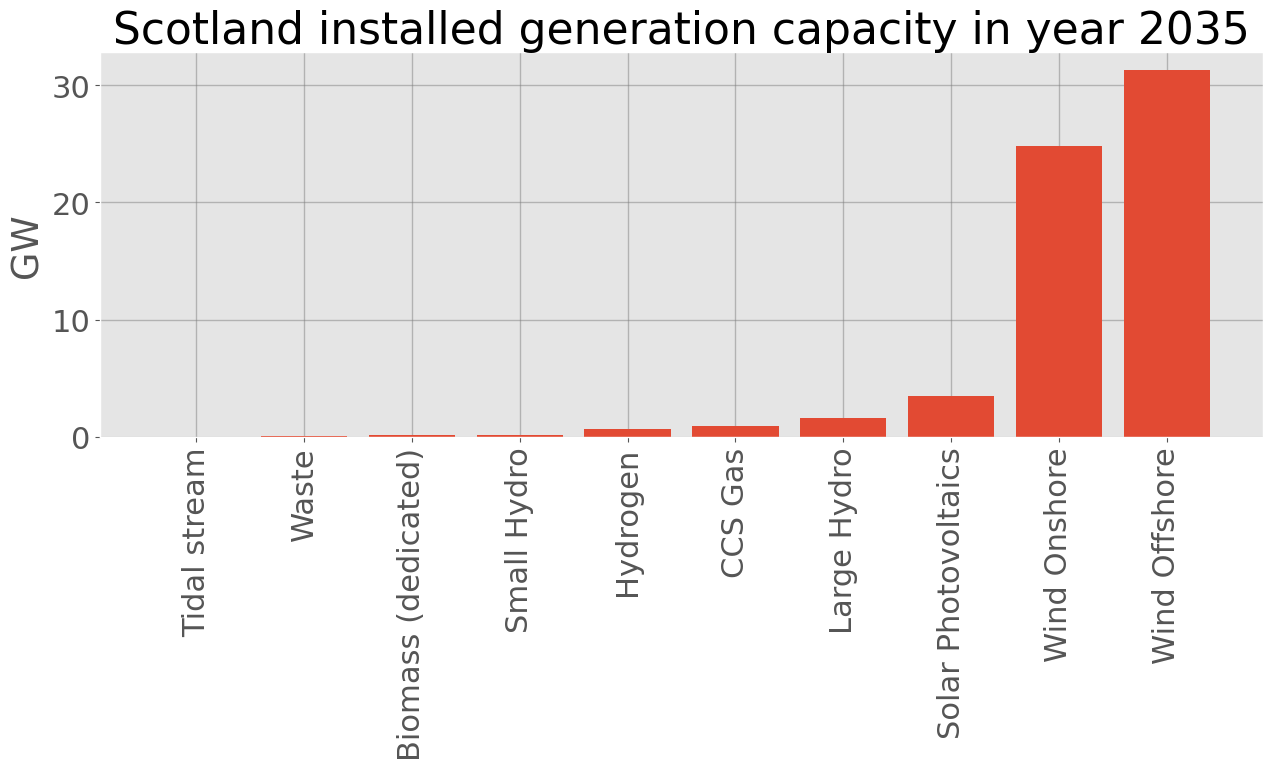

In [5]:
scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2035
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass', 'Natural Gas'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2035 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2035 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2035 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## Leading the Way - 2030

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


carrier
Waste                     80.736000
Small Hydro              222.628043
Biomass (dedicated)      238.472791
CCS Gas                  920.000000
Large Hydro             1631.002146
Solar Photovoltaics     2034.360003
Wind Offshore          13426.090000
Wind Onshore           22741.387706
Name: p_nom, dtype: float64
carrier
Liquid Air                       484.055172
Compressed Air                   552.634483
Pumped Storage Hydroelectric    2696.000000
Battery                         3201.233465
Name: p_nom, dtype: float64


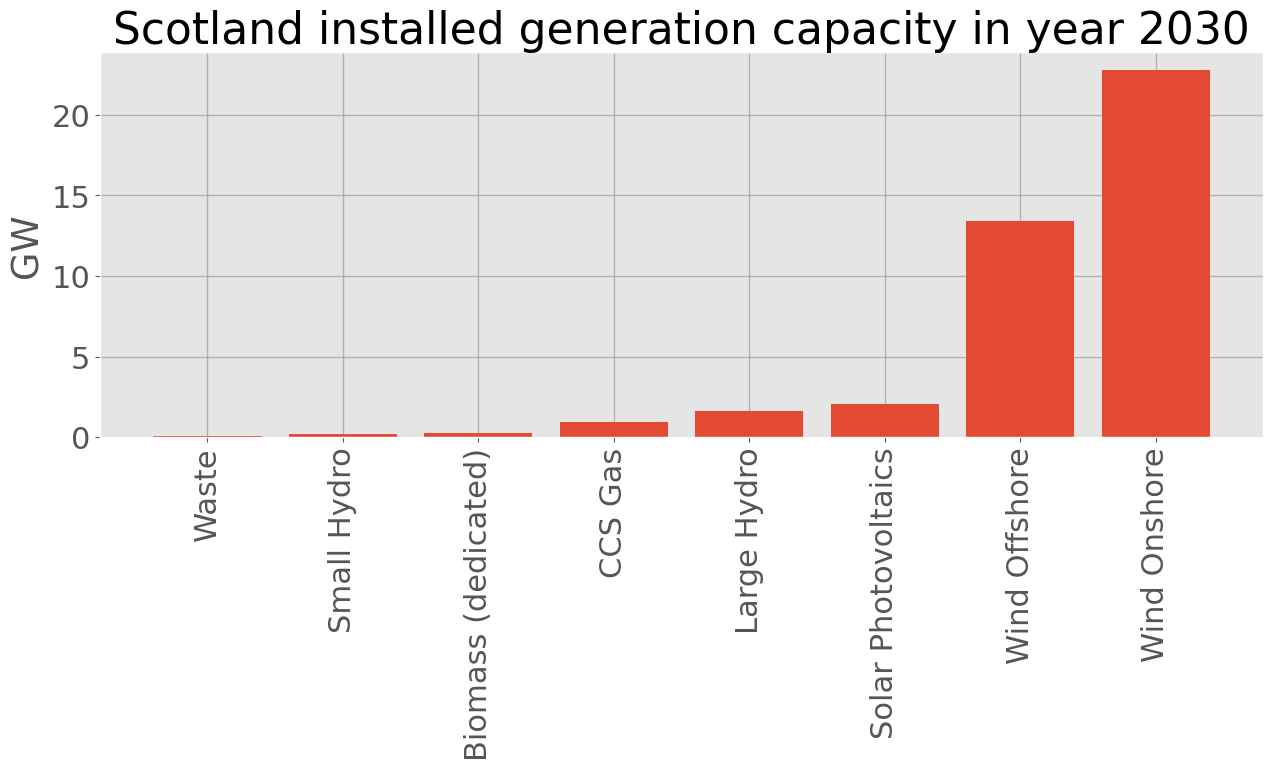

In [6]:
scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2030
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass', 'Natural Gas'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2030 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2030 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2030 = df_loads[buses_scotland].sum(axis=1).max()

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

## Leading the Way - 2021

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


carrier
Waste                    57.536000
Oil                     197.340000
Biomass (dedicated)     207.763239
Small Hydro             217.124238
Solar Photovoltaics     462.292021
Natural Gas            1038.400000
Large Hydro            1590.680533
Wind Offshore          1663.100000
Nuclear                1750.000000
Wind Onshore           8928.990012
Name: p_nom, dtype: float64
carrier
Compressed Air                    0.910345
Liquid Air                        1.379310
Battery                         124.353150
Pumped Storage Hydroelectric    740.000000
Name: p_nom, dtype: float64
4619.6939999999995


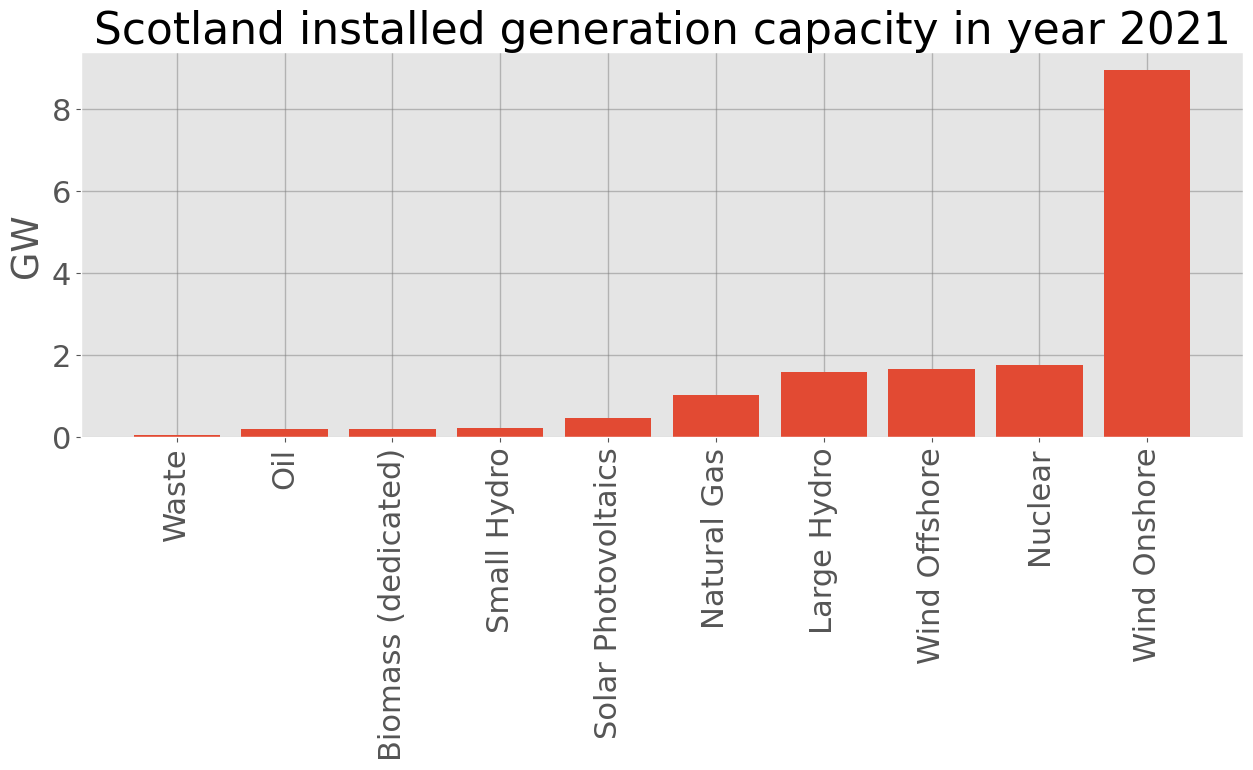

In [7]:
scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2021
year_baseline = 2012

start = str(year) + '-12-02 00:00:00'
end = str(year) + '-12-02 00:30:00'
# time step as fraction of hour
time_step = 0.5
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=False, scale_to_peak=True)

df_generators = pd.read_csv('LOPF_data/generators.csv', index_col=0)
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
# select generators in the buses in Scotland
df_generators_scotland = df_generators[df_generators.bus.isin(buses_scotland)]
generators_p_nom_scotland = df_generators_scotland.p_nom.groupby(
    df_generators_scotland.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom_scotland.drop(['Unmet Load', 'CCS Biomass'], inplace=True)
generators_p_nom_scotland.drop(generators_p_nom_scotland[generators_p_nom_scotland < 50].index, inplace=True)
print(generators_p_nom_scotland)
generators_p_nom_scotland_2021 = generators_p_nom_scotland

df_storage = pd.read_csv('LOPF_data/storage_units.csv', index_col=0)
df_storage_scotland = df_storage[df_storage.bus.isin(buses_scotland)]
storage_p_nom_scotland = df_storage_scotland.p_nom.groupby(
    df_storage_scotland.carrier).sum().sort_values()
print(storage_p_nom_scotland)
storage_p_nom_scotland_2021 = storage_p_nom_scotland

demand_dataset = 'eload'
start = str(year) + '-01-01 00:00:00'
end = str(year) + '-12-31 23:30:00' 
loads.write_loads(year)
loads.write_loads_p_set(start, end, year, time_step, demand_dataset, year_baseline=year_baseline, scenario=scenario, FES=2022, scale_to_peak=True)
df_loads = pd.read_csv('LOPF_data/loads-p_set.csv', index_col=0)
peak_load_scotland_2021 = df_loads[buses_scotland].sum(axis=1).max()
print(peak_load_scotland_2021)

plt.rcParams.update({'font.size': 22})
# bar chart
plt.figure(figsize=(15,5))
plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Scotland installed generation capacity in year ' + str(year))
plt.show()

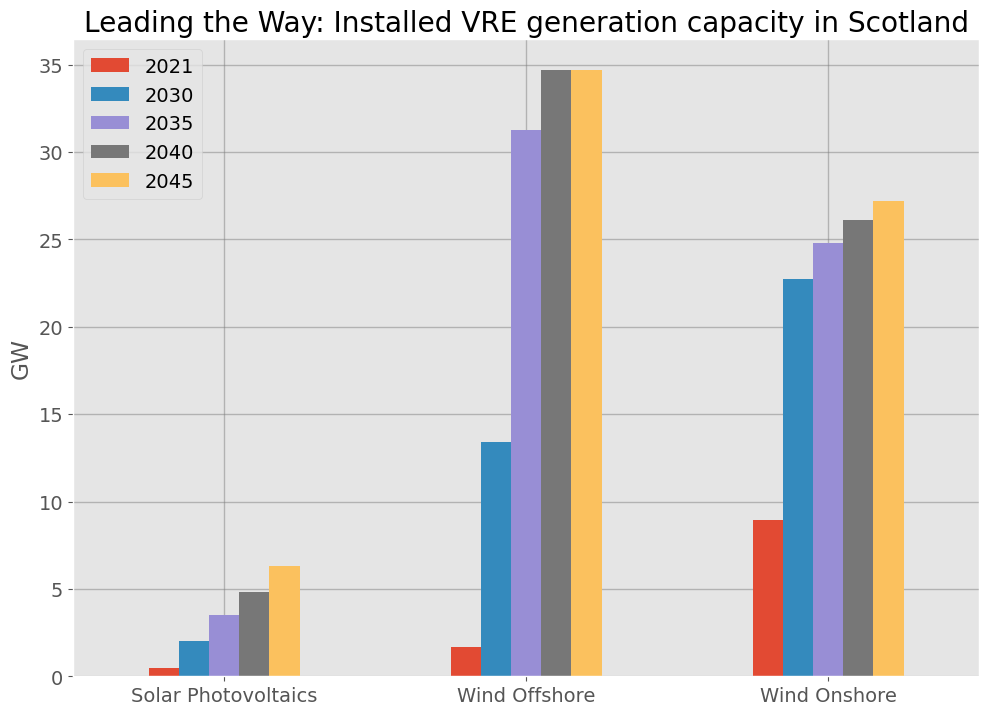

In [8]:
df = pd.concat([generators_p_nom_scotland_2021, generators_p_nom_scotland_2030, generators_p_nom_scotland_2035, generators_p_nom_scotland_2040, generators_p_nom_scotland_2045], axis=1) / 1000
df.loc['Large Hydro'] += df.loc['Small Hydro']
df.drop(['Small Hydro'], inplace=True)

df.columns = [2021, 2030, 2035, 2040, 2045]
df = df.reset_index().fillna(0)
df.iat[5, 0] = 'Hydro'

df_vres = df.iloc[[3, 6, 8]]
plt.rcParams.update({'font.size': 14})
df_vres.plot(x="carrier", y=[2021, 2030, 2035, 2040, 2045], kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('Leading the Way: Installed VRE generation capacity in Scotland')
plt.ylabel('GW')
plt.xlabel('')
plt.legend(loc='upper left')
# plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# plt.xticks(generators_p_nom_scotland.index, rotation=90)
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

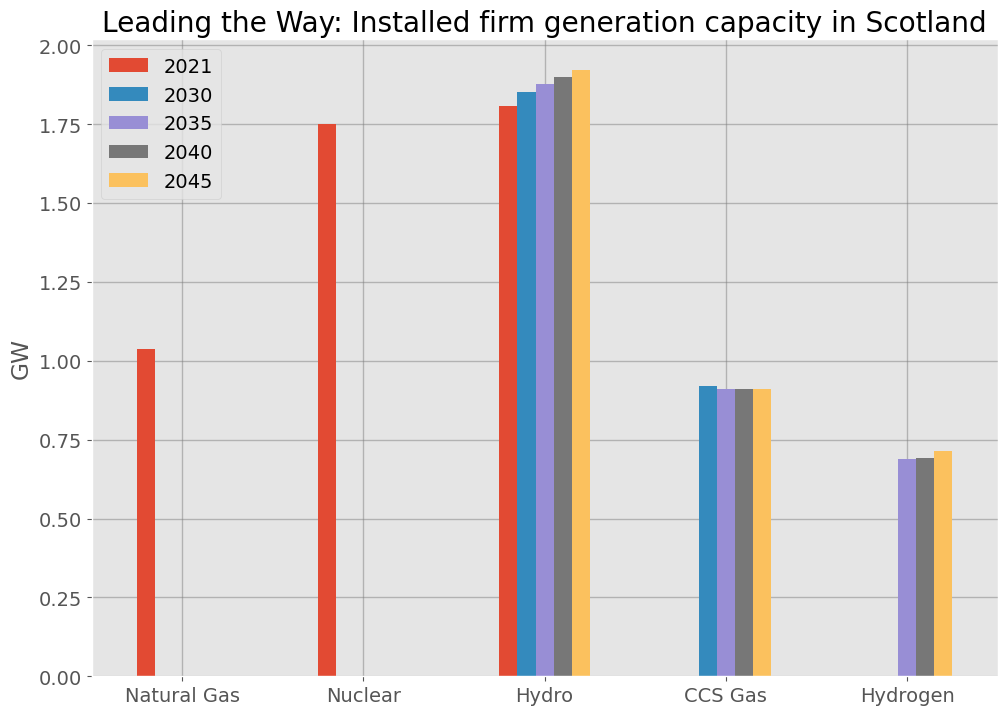

In [9]:
df_firm = df.iloc[[4, 7, 5, 9, 11]]
df_firm.plot(x="carrier", y=[2021, 2030, 2035, 2040, 2045], kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('Leading the Way: Installed firm generation capacity in Scotland')
plt.ylabel('GW')
plt.xlabel('')
plt.legend(loc='upper left')
# plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# plt.xticks(generators_p_nom_scotland.index, rotation=90)

plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

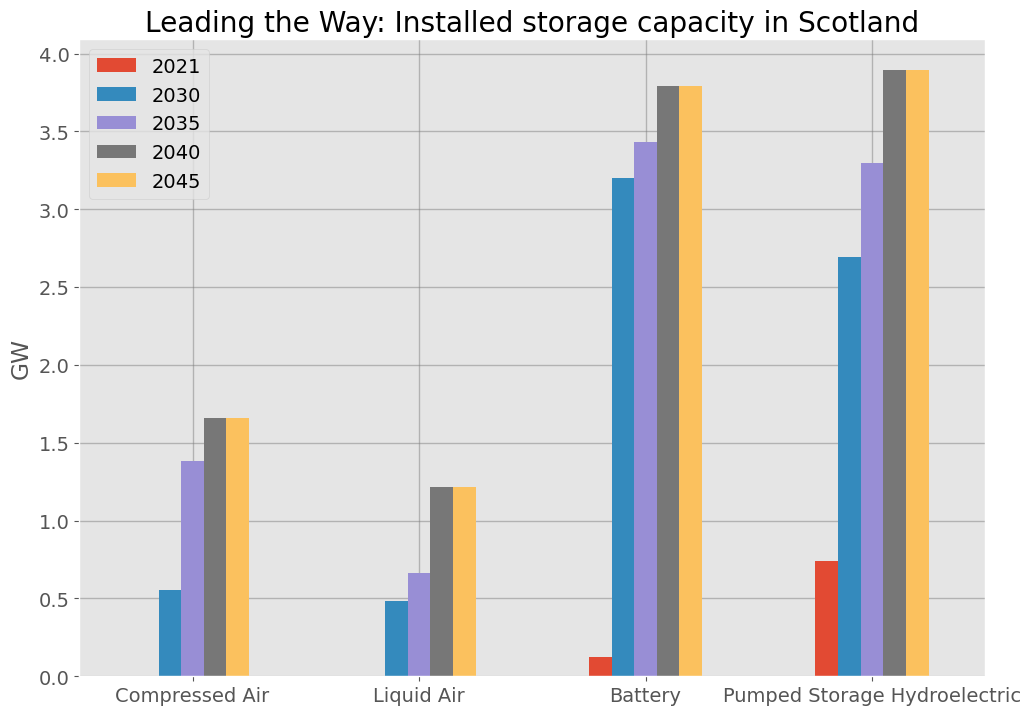

In [10]:
df_s = pd.concat([storage_p_nom_scotland_2021, storage_p_nom_scotland_2030, storage_p_nom_scotland_2035, storage_p_nom_scotland_2040, storage_p_nom_scotland_2045], axis=1) / 1000
df_s.columns = [2021, 2030, 2035, 2040, 2045]
df_s = df_s.reset_index().fillna(0)
df_s.plot(x="carrier", y=[2021, 2030, 2035, 2040, 2045], kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('Leading the Way: Installed storage capacity in Scotland')
plt.ylabel('GW')
plt.xlabel('')
plt.legend(loc='upper left')
# plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# plt.xticks(generators_p_nom_scotland.index, rotation=90)

plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

      Peak Demand
2021     4.619694
2030     5.376865
2035     7.134263
2040     8.539945
2045     9.290804


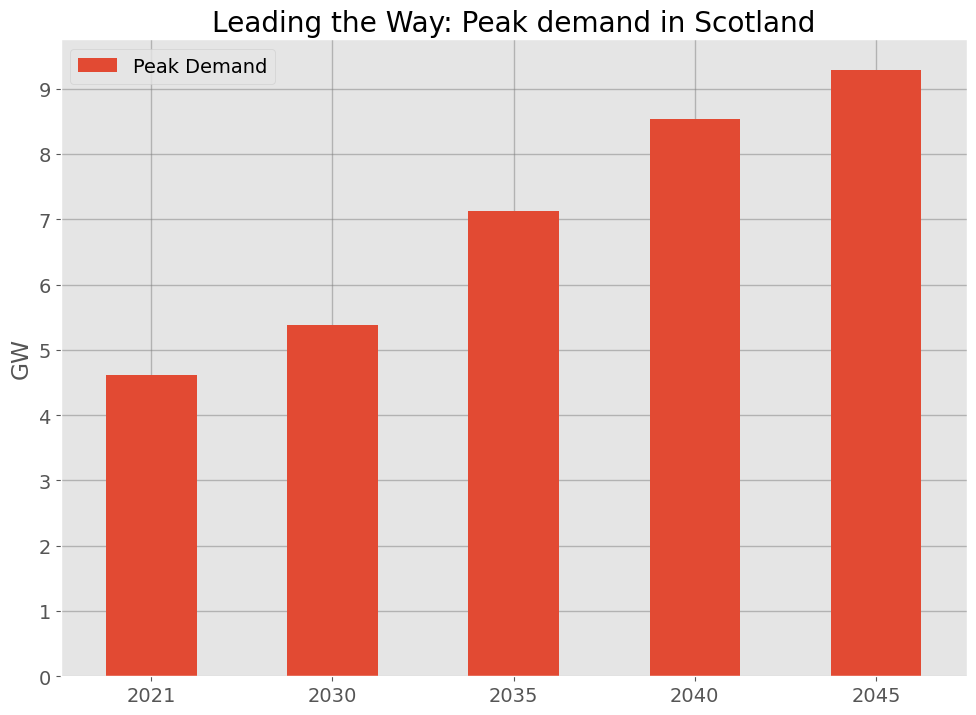

In [11]:
df_l = pd.DataFrame([peak_load_scotland_2021, peak_load_scotland_2030, peak_load_scotland_2035, peak_load_scotland_2040, peak_load_scotland_2045], columns=['Peak Demand']) / 1000
df_l.index = [2021, 2030, 2035, 2040, 2045]
# df_l = df_l.reset_index().fillna(0)
print(df_l)
df_l.plot(kind="bar", rot=0, figsize=(11.69, 8.27))
plt.title('Leading the Way: Peak demand in Scotland')
plt.ylabel('GW')
plt.yticks(np.arange(0, 10, 1.0))
# plt.xlabel('')
# plt.legend(loc='upper left')
# # plt.bar(generators_p_nom_scotland.index, generators_p_nom_scotland.values / 1000)
# # plt.xticks(generators_p_nom_scotland.index, rotation=90)

plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)